In [21]:
# Activity 3: Machine Learning - Student Segmentation & Risk Detection

## Objective
Use machine learning to identify hidden student patterns and risk groups.

This notebook performs:
- Data preprocessing and normalization
- K-Means clustering
- Risk group detection
- ML vs Rule-Based SRI comparison
- Cluster visualization


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3582123188.py, line 4)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [ ]:
df = pd.read_csv("../data/processed/students_scored.csv")
df.head()



,student_id,age,program,semester,gpa,attendance,assignments_completion,stress_level,sleep_hours,mental_wellbeing,productivity_score,distractions,career_clarity,skill_readiness,engagement_score,APS,WWS,PTMS,CRS,SRI
0,S001,20,B.Tech,8,5.78,77,96,6,6,5,6,2,9,6,66,59.43,51.0,67.8,72.0,62.14
1,S002,25,MBA,4,8.37,60,70,7,8,9,7,4,2,2,61,46.51,71.5,64.3,20.0,49.69
2,S003,18,MBA,7,6.57,76,100,4,4,3,9,1,5,10,79,59.97,41.0,86.7,80.0,65.58
3,S004,19,MBA,4,8.21,90,87,10,4,6,3,6,3,4,58,64.86,38.0,41.4,36.0,46.24
4,S005,23,B.Sc,4,6.10,78,76,6,4,4,10,3,8,4,96,56.03,40.0,89.8,56.0,58.77


In [ ]:
features = df[["APS","WWS","PTMS","CRS"]]
features.head()


,APS,WWS,PTMS,CRS
0,59.43,51.0,67.8,72.0
1,46.51,71.5,64.3,20.0
2,59.97,41.0,86.7,80.0
3,64.86,38.0,41.4,36.0
4,56.03,40.0,89.8,56.0


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)



In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["cluster_id"] = kmeans.fit_predict(scaled_features)

df.head()


,student_id,age,program,semester,gpa,attendance,assignments_completion,stress_level,sleep_hours,mental_wellbeing,...,distractions,career_clarity,skill_readiness,engagement_score,APS,WWS,PTMS,CRS,SRI,cluster_id
0,S001,20,B.Tech,8,5.78,77,96,6,6,5,...,2,9,6,66,59.43,51.0,67.8,72.0,62.14,0
1,S002,25,MBA,4,8.37,60,70,7,8,9,...,4,2,2,61,46.51,71.5,64.3,20.0,49.69,1
2,S003,18,MBA,7,6.57,76,100,4,4,3,...,1,5,10,79,59.97,41.0,86.7,80.0,65.58,0
3,S004,19,MBA,4,8.21,90,87,10,4,6,...,6,3,4,58,64.86,38.0,41.4,36.0,46.24,0
4,S005,23,B.Sc,4,6.10,78,76,6,4,4,...,3,8,4,96,56.03,40.0,89.8,56.0,58.77,0


In [ ]:
cluster_summary = df.groupby("cluster_id")[["APS","WWS","PTMS","CRS","SRI"]].mean()
cluster_summary


,APS,WWS,PTMS,CRS,SRI
cluster_id,,,,,
0,64.002925,53.683673,66.855782,62.789116,61.690136
1,52.764776,54.085821,59.922388,43.522388,52.215597
2,53.736091,70.295455,66.452727,72.018182,64.990091
3,60.583211,65.463303,42.899083,62.733945,58.804404


In [ ]:
def label_cluster(row):
    if row["SRI"] < 55:
        return "At-Risk"
    elif row["PTMS"] < 50:
        return "Productivity Risk"
    elif row["SRI"] > 64:
        return "High Performer"
    else:
        return "Stable"

cluster_summary["label"] = cluster_summary.apply(label_cluster, axis=1)
cluster_summary


,APS,WWS,PTMS,CRS,SRI,label
cluster_id,,,,,,
0,64.002925,53.683673,66.855782,62.789116,61.690136,Stable
1,52.764776,54.085821,59.922388,43.522388,52.215597,At-Risk
2,53.736091,70.295455,66.452727,72.018182,64.990091,High Performer
3,60.583211,65.463303,42.899083,62.733945,58.804404,Productivity Risk


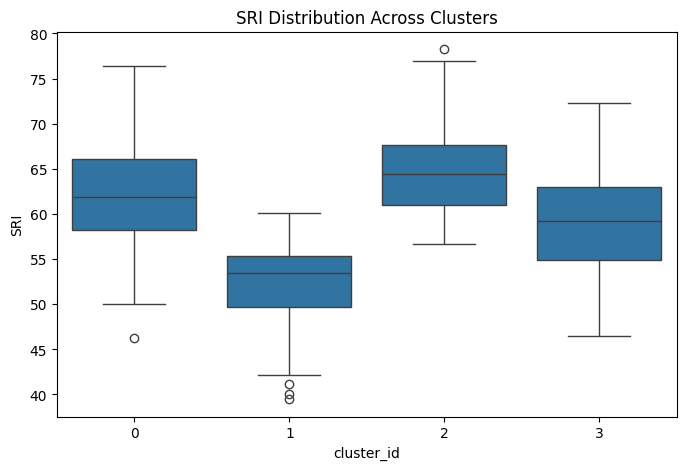

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="cluster_id", y="SRI", data=df)
plt.title("SRI Distribution Across Clusters")
plt.show()


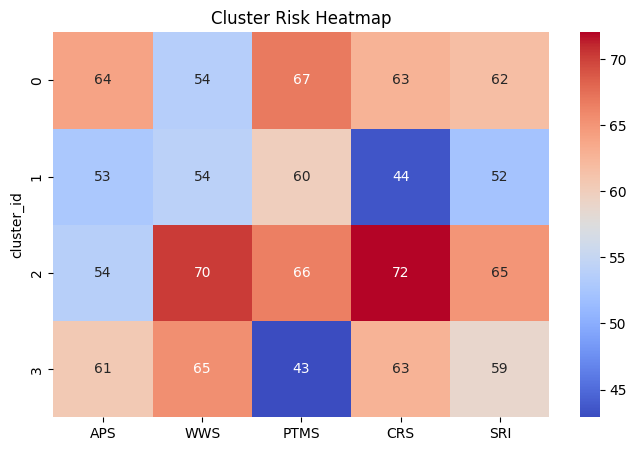

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(cluster_summary[["APS","WWS","PTMS","CRS","SRI"]],
            annot=True,
            cmap="coolwarm")
plt.title("Cluster Risk Heatmap")
plt.show()


In [ ]:
career_confused = df[(df["CRS"] < 55) & (df["APS"] > 60)]

print("Number of Career-Confused Students:", len(career_confused))
career_confused.head()


Number of Career-Confused Students: 64


,student_id,age,program,semester,gpa,attendance,assignments_completion,stress_level,sleep_hours,mental_wellbeing,...,distractions,career_clarity,skill_readiness,engagement_score,APS,WWS,PTMS,CRS,SRI,cluster_id
3,S004,19,MBA,4,8.21,90,87,10,4,6,...,6,3,4,58,64.86,38.0,41.4,36.0,46.24,0
5,S006,19,MCA,7,5.05,91,91,6,8,6,...,6,4,5,83,65.22,62.0,68.9,46.0,60.35,0
10,S011,18,MBA,1,5.58,93,77,8,8,7,...,6,4,5,87,63.57,61.0,50.1,46.0,55.84,3
29,S030,19,MBA,2,5.99,97,68,1,6,5,...,2,5,2,40,63.90,63.5,72.0,32.0,57.45,0
36,S037,21,B.Sc,8,7.43,94,76,7,4,10,...,5,3,5,98,64.43,61.5,68.4,42.0,58.88,0


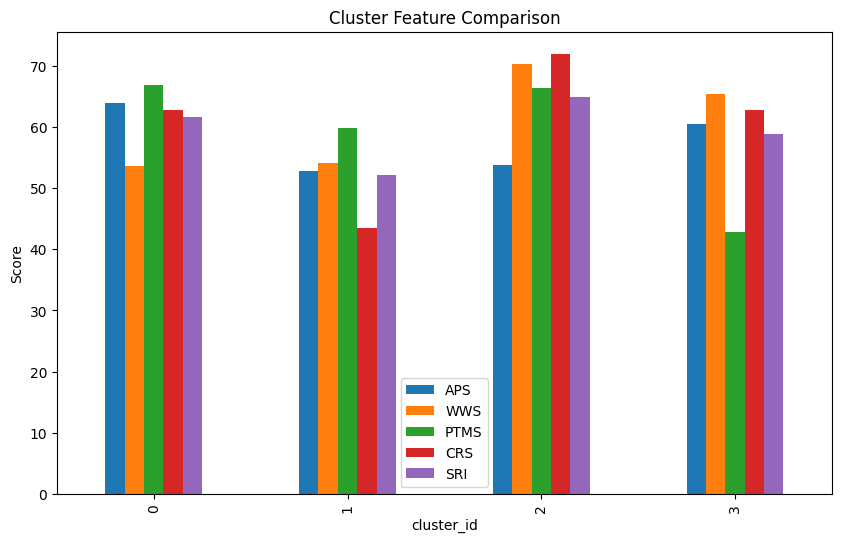

In [ ]:
cluster_summary.plot(kind="bar", figsize=(10,6))
plt.title("Cluster Feature Comparison")
plt.ylabel("Score")
plt.show()


In [ ]:
df.to_csv("../data/processed/students_clustered.csv", index=False)
print("Clustered dataset saved.")


Clustered dataset saved.


In [ ]:
# Map cluster labels automatically based on summary

cluster_labels = {}

for idx, row in cluster_summary.iterrows():
    if row["SRI"] < 55:
        cluster_labels[idx] = "At-Risk"
    elif row["PTMS"] < 50:
        cluster_labels[idx] = "Productivity Risk"
    elif row["SRI"] > 64:
        cluster_labels[idx] = "High Performer"
    else:
        cluster_labels[idx] = "Stable"

cluster_labels


{0: 'Stable', 1: 'At-Risk', 2: 'High Performer', 3: 'Productivity Risk'}

In [ ]:
df["cluster_label"] = df["cluster_id"].map(cluster_labels)
df.head()


,student_id,age,program,semester,gpa,attendance,assignments_completion,stress_level,sleep_hours,mental_wellbeing,...,career_clarity,skill_readiness,engagement_score,APS,WWS,PTMS,CRS,SRI,cluster_id,cluster_label
0,S001,20,B.Tech,8,5.78,77,96,6,6,5,...,9,6,66,59.43,51.0,67.8,72.0,62.14,0,Stable
1,S002,25,MBA,4,8.37,60,70,7,8,9,...,2,2,61,46.51,71.5,64.3,20.0,49.69,1,At-Risk
2,S003,18,MBA,7,6.57,76,100,4,4,3,...,5,10,79,59.97,41.0,86.7,80.0,65.58,0,Stable
3,S004,19,MBA,4,8.21,90,87,10,4,6,...,3,4,58,64.86,38.0,41.4,36.0,46.24,0,Stable
4,S005,23,B.Sc,4,6.10,78,76,6,4,4,...,8,4,96,56.03,40.0,89.8,56.0,58.77,0,Stable


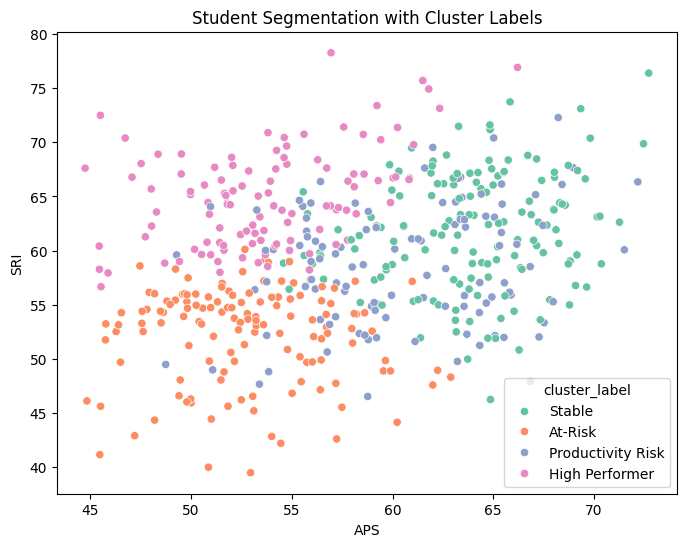

In [ ]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x="APS",
    y="SRI",
    hue="cluster_label",
    data=df,
    palette="Set2"
)

plt.title("Student Segmentation with Cluster Labels")
plt.show()


In [ ]:
for cid, label in cluster_labels.items():
    print(f"Cluster {cid} → {label}")


Cluster 0 → Stable
Cluster 1 → At-Risk
Cluster 2 → High Performer
Cluster 3 → Productivity Risk


In [ ]:
## Conclusion

Machine learning segmentation identified four distinct student groups.
The clusters align closely with rule-based SRI insights, confirming the reliability of the scoring system.

At-Risk students require immediate intervention, while High Performers show strong readiness for advanced mentoring programs.
